# **Business Understanding**


## **1.1 Overview**
E-commerce adalah platform perdagangan elektronik yang mengalami pertumbuhan pesat di seluruh dunia. Promo adalah salah satu alat pemasaran yang efektif dalam meningkatkan penjualan. Namun, untuk memastikan bahwa penggunaan kode promo memberikan dampak yang diharapkan, perlu dilakukan analisis terhadap efektivitasnya.

Metode Z-Score adalah suatu teknik statistik yang digunakan untuk mengukur sejauh mana suatu variabel berbeda dari rata-rata dalam satuan deviasi standar. Dalam konteks ini, metode Z-Score digunakan untuk mengevaluasi efektivitas penggunaan kode promo terhadap peningkatan penjualan.


Tujuan:
- Mengidentifikasi dan memahami kelompok pengguna yang paling efektif dalam memanfaatkan diskon atau penawaran khusus. Hal ini dilakukan dengan menggunakan berbagai metode clustering (seperti K-Means, K-Prototypes, K-Modes) dan model SVM untuk memisahkan pengguna berdasarkan pola penggunaan diskon.

Dengan demikian, bisnis dapat fokus pada strategi pemasaran yang lebih terarah untuk meningkatkan efektivitas diskon pada kelompok-kelompok yang tepat.



# 2. Data Preparation

### **2.1 Library**

In [ ]:
# Data Manipulation
import pandas as pd #untuk menangani atau manipulasi data
import numpy as np #untuk operasi numerik

# Data Visualization
import matplotlib.pyplot as plt #untuk plotting dan visualisasi data
import seaborn as sns #untuk visualisasi data yang lebih interaktif

#Data Collection
import ast

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Export Output DataFrame
from google.colab import files


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display

%matplotlib inline

### 2.2 Read Dataset

In [ ]:
# Set the max columns to none
pd.set_option('display.max_columns', None)

In [ ]:
#Login Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read Dataset use Google Drive
df_transactions = pd.read_parquet('/content/drive/MyDrive/Dataset/transactions.parquet',engine='pyarrow')
df_customer = pd.read_parquet('/content/drive/MyDrive/Dataset/customer.parquet',engine='pyarrow')
df_product = pd.read_parquet('/content/drive/MyDrive/Dataset/product.parquet',engine='pyarrow')
df_click_stream = pd.read_parquet('/content/drive/MyDrive/Dataset/click_stream.parquet',engine='pyarrow')

### 2.3 Data Collection

#### **Transactions Dataset**

In [ ]:
df_transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832.0
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526.0
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696.0
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012.0
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31377,2021-12-07T20:31:11.122912Z,47779,2514d4ae-1a8b-4f09-a94f-9647a26609e5,a41cc05a-f279-47bd-9533-18cacca121ca,"[{'product_id': 39211, 'quantity': 1, 'item_pr...",Credit Card,Success,6065,BUYMORE,10000,2021-12-13T13:57:08.648452Z,-0.810481,116.139788,75952.0
31378,2021-12-30T20:44:59.122912Z,47779,a09993bd-432f-4b65-bac5-91a157d79a8f,bdacc5e2-1a80-41aa-8822-b372516d2e52,"[{'product_id': 16116, 'quantity': 2, 'item_pr...",Credit Card,Success,8053,AZ2022,10000,2022-01-03T04:44:09.316706Z,-6.944222,107.773628,366163.0
31379,2022-01-22T20:50:31.122912Z,47779,322bd19d-57d3-4169-84b5-381821af7817,3b54ca96-0db7-4b68-8d7e-ca57df02e3a0,"[{'product_id': 53373, 'quantity': 1, 'item_pr...",Credit Card,Success,3365,WEEKENDMANTAP,0,2022-01-28T20:25:30.234548Z,-3.546199,102.136975,209206.0
31380,2022-02-14T20:51:24.122912Z,47779,6c44a300-2731-4da7-9b40-22966b7cfe6e,00748cad-14bc-4d44-a48d-e8824e15b803,"[{'product_id': 19387, 'quantity': 2, 'item_pr...",Credit Card,Success,0,None,0,2022-02-15T23:42:32.563182Z,-3.546199,102.136975,479866.0


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31382 entries, 0 to 31381
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              31382 non-null  object 
 1   customer_id             31382 non-null  int64  
 2   booking_id              31382 non-null  object 
 3   session_id              31382 non-null  object 
 4   product_metadata        31382 non-null  object 
 5   payment_method          31382 non-null  object 
 6   payment_status          31382 non-null  object 
 7   promo_amount            31382 non-null  int64  
 8   promo_code              13271 non-null  object 
 9   shipment_fee            31382 non-null  int64  
 10  shipment_date_limit     31382 non-null  object 
 11  shipment_location_lat   31381 non-null  float64
 12  shipment_location_long  31381 non-null  float64
 13  total_amount            31381 non-null  float64
dtypes: float64(3), int64(3), object(8)
mem

In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking = df_transactions[df_transactions['booking_id'] == 'd28f7ac8-524a-4c79-b44d-f2d794a73a8f']

# Menampilkan data hasil pemilihan
specific_booking


,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
46,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,"[{'product_id': 43835, 'quantity': 1, 'item_pr...",OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29452,106.803498,4789235.0


In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking1 = df_transactions[df_transactions['booking_id'] == '186e2bee-0637-4710-8981-50c2d737bc42']

# Menampilkan data hasil pemilihan
specific_booking1


,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832.0


In [ ]:
import pandas as pd
import json

# Ubah kolom 'product_metadata' dari string JSON ke objek Python
df_transactions['product_metadata'] = df_transactions['product_metadata'].apply(lambda x: json.loads(x))

# Ekstraksi data produk
df_transactions['product_id'] = df_transactions['product_metadata'].apply(lambda x: [item['product_id'] for item in x])
df_transactions['quantity'] = df_transactions['product_metadata'].apply(lambda x: [item['quantity'] for item in x])
df_transactions['item_price'] = df_transactions['product_metadata'].apply(lambda x: [item['item_price'] for item in x])

# Mengubah setiap produk menjadi baris terpisah
df_transactions = df_transactions.explode('product_id').reset_index(drop=True)
df_transactions = df_transactions.explode('quantity').reset_index(drop=True)
df_transactions = df_transactions.explode('item_price').reset_index(drop=True)

# Mengubah tipe data kolom yang sesuai jika diperlukan
df_transactions['product_id'] = df_transactions['product_id'].astype(int)
df_transactions['quantity'] = df_transactions['quantity'].astype(int)
df_transactions['item_price'] = df_transactions['item_price'].astype(float)


JSONDecodeError: ignored

In [ ]:
import pandas as pd
import ast

# Ubah kolom 'event_metadata' menjadi string dan kemudian menjadi list
df_transactions['product_metadata'] = df_transactions['product_metadata'].astype('string').map(ast.literal_eval)

# Pisahkan kolom 'event_metadata' menjadi baris terpisah
df_transactions = df_transactions.explode('product_metadata')

# Atur ulang indeks DataFrame
df_transactions = df_transactions.reset_index(drop=True)

# Buat DataFrame baru dari data JSON di kolom 'event_metadata'
tmp = pd.json_normalize(df_transactions['product_metadata'])

# Gabungkan DataFrame baru dengan DataFrame asli
df_transactions = pd.concat([df_transactions, tmp], axis=1)

In [ ]:
tmp

,product_id,quantity,item_price
0,54728,1,191247
1,16193,1,145526
2,53686,4,135174
3,20228,1,271012
4,55220,1,198753
...,...,...,...
45939,39211,1,72017
45940,16116,2,182108
45941,53373,1,212571
45942,19387,2,239933


In [ ]:
# Drop useless column
df_transactions.drop(columns=['product_metadata'], inplace=True)

In [ ]:
df_transactions

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45939,2021-12-07T20:31:11.122912Z,47779,2514d4ae-1a8b-4f09-a94f-9647a26609e5,a41cc05a-f279-47bd-9533-18cacca121ca,Credit Card,Success,6065,BUYMORE,10000,2021-12-13T13:57:08.648452Z,-0.81,116.14,75952.00,39211,1,72017
45940,2021-12-30T20:44:59.122912Z,47779,a09993bd-432f-4b65-bac5-91a157d79a8f,bdacc5e2-1a80-41aa-8822-b372516d2e52,Credit Card,Success,8053,AZ2022,10000,2022-01-03T04:44:09.316706Z,-6.94,107.77,366163.00,16116,2,182108
45941,2022-01-22T20:50:31.122912Z,47779,322bd19d-57d3-4169-84b5-381821af7817,3b54ca96-0db7-4b68-8d7e-ca57df02e3a0,Credit Card,Success,3365,WEEKENDMANTAP,0,2022-01-28T20:25:30.234548Z,-3.55,102.14,209206.00,53373,1,212571
45942,2022-02-14T20:51:24.122912Z,47779,6c44a300-2731-4da7-9b40-22966b7cfe6e,00748cad-14bc-4d44-a48d-e8824e15b803,Credit Card,Success,0,None,0,2022-02-15T23:42:32.563182Z,-3.55,102.14,479866.00,19387,2,239933


In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking = df_transactions[df_transactions['booking_id'] == 'd28f7ac8-524a-4c79-b44d-f2d794a73a8f']

# Menampilkan data hasil pemilihan
specific_booking


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
61,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,43835,1,250242
62,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,27747,1,184245
63,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,32298,1,186323
64,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,51368,1,421799
65,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,35102,1,297640
66,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,47142,1,220890
67,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,20305,1,305038
68,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,10078,1,205530
69,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,2402,1,447533
70,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,6831,1,134341


In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking1 = df_transactions[df_transactions['booking_id'] == '186e2bee-0637-4710-8981-50c2d737bc42']

# Menampilkan data hasil pemilihan
specific_booking1


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247


#### Customer Dataset

In [ ]:
df_customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.30,115.77,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.98,114.92,Kalimantan Selatan,Indonesia,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.20,105.64,Lampung,Indonesia,2020-10-17
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.47,95.90,Aceh,Indonesia,2017-11-25
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.33,127.03,Maluku,Indonesia,2018-09-01
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.17,101.50,Jambi,Indonesia,2020-05-31


In [ ]:
df_customer.shape

(100000, 15)

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

#### Product Dataset

In [ ]:
df_product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt,None,None
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans,None,None
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch,None,None
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants,None,None
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.00,Casual,Gas Men Caddy Casual Shoe,None,None
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.00,Casual,Lotto Men's Soccer Track Flip Flop,None,None
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.00,Casual,Puma Men Graphic Stellar Blue Tshirt,None,None
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.00,Casual,Rasasi Women Blue Lady Perfume,None,None


In [ ]:
df_product.shape

(44446, 12)

In [ ]:
df_product.rename(columns={'id': 'product_id'}, inplace=True)

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         21 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
df_product.drop('Unnamed: 10', axis=1, inplace=True)
df_product.drop('Unnamed: 11', axis=1, inplace=True)

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_product

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.00,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.00,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.00,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.00,Casual,Rasasi Women Blue Lady Perfume


#### Click Stream Dataset

In [ ]:
df_click_stream

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,None
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,None
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,None
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}
...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'}
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,None
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,"{'product_id': 19820, 'quantity': 1, 'item_pri..."
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,{'payment_status': 'Success'}


In [ ]:
df_click_stream.shape

(12833602, 6)

In [ ]:
df_click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
df_click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
# Drop useless column
df_click_stream.drop(columns=['event_metadata'], inplace=True)

In [ ]:
df_click_stream

,session_id,event_name,event_time,event_id,traffic_source
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE
...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE


# **3 EDA ( Exploratory Data  Analysis)**

### **3.1 Data Wrangling**


In [ ]:
df_click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
dtypes: object(5)
memory usage: 489.6+ MB


In [ ]:
df_click_stream.head()

,session_id,event_name,event_time,event_id,traffic_source
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.30,115.77,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.98,114.92,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
df_product.head()

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45944 entries, 0 to 45943
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              45944 non-null  object 
 1   customer_id             45944 non-null  int64  
 2   booking_id              45944 non-null  object 
 3   session_id              45944 non-null  object 
 4   payment_method          45944 non-null  object 
 5   payment_status          45944 non-null  object 
 6   promo_amount            45944 non-null  int64  
 7   promo_code              19593 non-null  object 
 8   shipment_fee            45944 non-null  int64  
 9   shipment_date_limit     45944 non-null  object 
 10  shipment_location_lat   45943 non-null  float64
 11  shipment_location_long  45943 non-null  float64
 12  total_amount            45943 non-null  float64
 13  product_id              45944 non-null  int64  
 14  quantity                45944 non-null

In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45944 entries, 0 to 45943
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              45944 non-null  object 
 1   customer_id             45944 non-null  int64  
 2   booking_id              45944 non-null  object 
 3   session_id              45944 non-null  object 
 4   payment_method          45944 non-null  object 
 5   payment_status          45944 non-null  object 
 6   promo_amount            45944 non-null  int64  
 7   promo_code              19593 non-null  object 
 8   shipment_fee            45944 non-null  int64  
 9   shipment_date_limit     45944 non-null  object 
 10  shipment_location_lat   45943 non-null  float64
 11  shipment_location_long  45943 non-null  float64
 12  total_amount            45943 non-null  float64
 13  product_id              45944 non-null  int64  
 14  quantity                45944 non-null

## 3.2 Handling Missing Value

In [ ]:
# Checking null values
df_transactions.isna().sum()

created_at                    0
customer_id                   0
booking_id                    0
session_id                    0
payment_method                0
payment_status                0
promo_amount                  0
promo_code                26351
shipment_fee                  0
shipment_date_limit           0
shipment_location_lat         1
shipment_location_long        1
total_amount                  1
product_id                    0
quantity                      0
item_price                    0
dtype: int64

In [ ]:
# Mengisi nilai kosong di shipment_location_lat dan shipment_location_long dengan rata-rata
df_transactions['shipment_location_lat'].fillna(df_transactions['shipment_location_lat'].mean(), inplace=True)
df_transactions['shipment_location_long'].fillna(df_transactions['shipment_location_long'].mean(), inplace=True)


In [ ]:
# Menghapus baris dengan nilai null pada kolom 'total_amount'
df_transactions.dropna(subset=['total_amount'], inplace=True)

# # Mengisi nilai kosong di total_amount dengan rata-rata
# df_transactions['total_amount'].fillna(df_transactions['total_amount'].mean(), inplace=True)



In [ ]:
# Ganti nilai kosong dengan "None"
df_transactions['promo_code'].fillna('None', inplace=True)


In [ ]:
missing_data = df_transactions.isnull().sum()
print(missing_data)

created_at                0
customer_id               0
booking_id                0
session_id                0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
dtype: int64


In [ ]:
missing_data = df_customer.isnull().sum()
print(missing_data)

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64


In [ ]:
missing_data = df_product.isnull().sum()
print(missing_data)

product_id              0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [ ]:
# Melihat tipe data untuk setiap kolom
tipe_data_kolom = df_product.dtypes

# Menampilkan hasil
print(tipe_data_kolom)


product_id              int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object


In [ ]:
# Mengisi nilai kosong
modus_basecolour = df_product['baseColour'].mode()[0]
modus_season = df_product['season'].mode()[0]
modus_usage = df_product['usage'].mode()[0]
modus_productDisplayName  = df_product['productDisplayName'].mode()[0]

# Mengisi nilai kosong dengan modus
df_product['baseColour'].fillna(modus_basecolour, inplace=True)
df_product['season'].fillna(modus_season, inplace=True)
df_product['usage'].fillna(modus_usage, inplace=True)
df_product['productDisplayName'].fillna(modus_productDisplayName, inplace=True)


In [ ]:
df_product['year'].fillna(df_product['year'].median(), inplace=True)

In [ ]:
missing_data = df_product.isnull().sum()
print(missing_data)

product_id            0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


In [ ]:
missing_data = df_click_stream.isnull().sum()
print(missing_data)

session_id        0
event_name        0
event_time        0
event_id          0
traffic_source    0
dtype: int64


# **4 Join Dataset**


In [ ]:
df_zeus = pd.merge(df_transactions, df_customer, on='customer_id', how='left')
df_zeus = df_zeus.merge(df_product, on="product_id", how="left")
# df_zeus = df_zeus.merge(df_click_stream, on="session_id", how="left")

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df_zeus.head(100)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-08-08T14:10:55.162570Z,58191,2fc60434-97bd-40ee-8c61-6a306c8a4c84,f389bf05-5e36-4211-9888-41107b90b97c,OVO,Success,0,None,10000,2019-08-13T21:42:41.194378Z,-6.21,106.75,418823.00,22987,1,408823,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Men,Apparel,Bottomwear,Shorts,Grey,Summer,2016.00,Sports,2go Active Gear USA Men Grey Ted Shorts
96,2019-08-23T14:10:47.162570Z,58191,ff64ffb0-79fc-4241-8cb5-78574cec6113,59380c93-535b-4c23-94f4-f9e6d615f842,OVO,Success,1948,XX2022,10000,2019-08-29T00:52:06.385992Z,-6.16,106.76,268107.00,13903,1

In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking1 = df_transactions[df_transactions['booking_id'] == '186e2bee-0637-4710-8981-50c2d737bc42']

# Menampilkan data hasil pemilihan
specific_booking1

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247


In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking1 = df_zeus[df_zeus['booking_id'] == '186e2bee-0637-4710-8981-50c2d737bc42']

# Menampilkan data hasil pemilihan
specific_booking1

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes


In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking = df_transactions[df_transactions['booking_id'] == 'd28f7ac8-524a-4c79-b44d-f2d794a73a8f']

# Menampilkan data hasil pemilihan
specific_booking

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
61,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,43835,1,250242
62,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,27747,1,184245
63,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,32298,1,186323
64,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,51368,1,421799
65,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,35102,1,297640
66,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,47142,1,220890
67,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,20305,1,305038
68,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,10078,1,205530
69,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,2402,1,447533
70,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,6831,1,134341


In [ ]:
# Menampilkan baris dengan booking_id tertentu
specific_booking = df_zeus[df_zeus['booking_id'] == 'd28f7ac8-524a-4c79-b44d-f2d794a73a8f']

# Menampilkan data hasil pemilihan
specific_booking

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
61,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,43835,1,250242,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Women,Accessories,Jewellery,Earrings,Maroon,Summer,2012.00,Casual,Royal Diadem Maroon Earrings
62,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,27747,1,184245,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Brown,Winter,2015.00,Casual,Murcia Women Brown Handbag
63,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,32298,1,186323,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Men,Accessories,Watches,Watches,Black,Winter,2016.00,Casual,Q&Q Men Black Dial Watch
64,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,51368,1,421799,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Women,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Spykar Women Blue Jeans
65,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,35102,1,297640,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Women,Accessories,Stoles,Stoles,Navy Blue,Spring,2013.00,Casual,Allen Solly Women Navy Blue Stole
66,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,47142,1,220890,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.33,118.77,Nusa Tenggara Barat,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,White,Summer,2015.00,Casual,Be For Bag Women White and Pink Combo pack Tot...
67,2019-02-24T13:19:30.162570Z,58191,d28f7ac8-524a-4c79-b44d-f2d794a73a8f,a680f1f6-1781-4b8e-8836-54bafdae34bc,OVO,Success,0,None,10000,2019-02-26T12:10:22.528167Z,-6.29,106.80,4789235.00,20305,1,305038,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.3

## 4.1 Data Cleansing

In [ ]:
# Checking null values
df_zeus.isna().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
first_name                0
last_name                 0
username                  0
email                     0
gender_x                  0
birthdate                 0
device_type               0
device_id                 0
device_version            0
home_location_lat         0
home_location_long        0
home_location             0
home_country              0
first_join_date           0
gender_y                  0
masterCategory            0
subCategory               0
articleType               0
baseColour                0
season              

In [ ]:
# Check size dataset

print('Ukuran dataset %d baris dan %d kolom' % df_zeus.shape)

Ukuran dataset 45943 baris dan 39 kolom


In [ ]:
# Cek duplikasi berdasarkan seluruh kolom
duplicate_rows = df_zeus[df_zeus.duplicated()]

# Cek apakah ada duplikasi
if duplicate_rows.shape[0] == 0:
    print("Tidak ada duplikasi pada df_zeus.")
else:
    print("Ada duplikasi pada df_zeus.")


Tidak ada duplikasi pada df_zeus.


In [ ]:
df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14T20:49:59.122912Z,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summer,2011.00,Ethnic,W Women Printed Pink Kurtas
45939,2021-12-07T20:31:11.122912Z,47779,2514d4ae-1a8b-4f09-a94f-9647a26609e5,a41cc05a-f279-47bd-9533-18cacca121ca,Credit Card,Success,6065,BUYMORE,10000,2021-12-13T13:57:08.648452Z,-0.81,116.14,75952.00,39211,1,72

## 4.2 Data Visualization

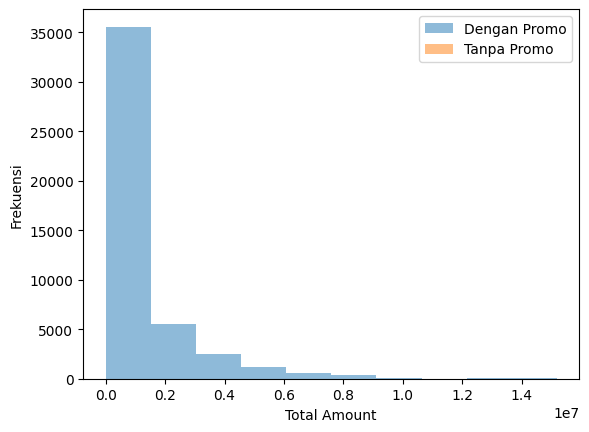

In [ ]:
#Histogram dari Total Amount dengan dan tanpa Promo:


import matplotlib.pyplot as plt

# Memisahkan data dengan dan tanpa promo
with_promo = df_transactions[df_transactions['promo_code'].notnull()]
without_promo = df_transactions[df_transactions['promo_code'].isnull()]

# Membuat histogram
plt.hist(with_promo['total_amount'], alpha=0.5, label='Dengan Promo')
plt.hist(without_promo['total_amount'], alpha=0.5, label='Tanpa Promo')
plt.legend(loc='upper right')
plt.xlabel('Total Amount')
plt.ylabel('Frekuensi')
plt.show()

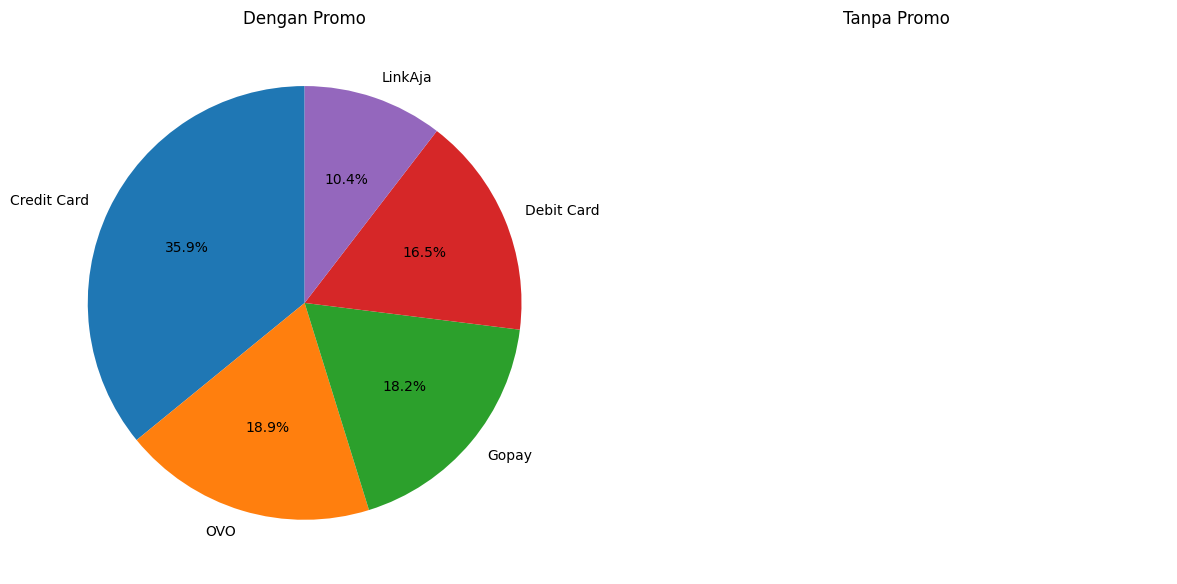

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah pembayaran dengan dan tanpa promo
with_promo_counts = with_promo['payment_method'].value_counts()
without_promo_counts = without_promo['payment_method'].value_counts()

# Membuat pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(with_promo_counts, labels=with_promo_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Dengan Promo')

ax2.pie(without_promo_counts, labels=without_promo_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Tanpa Promo')

plt.tight_layout()
plt.show()


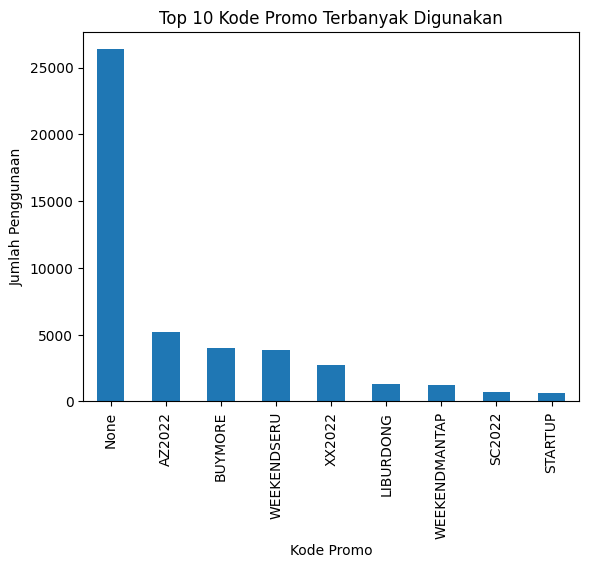

In [ ]:
#Penggunaan Kode Promo Terbanyak:

top_promo_codes = df_transactions['promo_code'].value_counts().nlargest(10)

# Membuat bar plot
top_promo_codes.plot(kind='bar')
plt.xlabel('Kode Promo')
plt.ylabel('Jumlah Penggunaan')
plt.title('Top 10 Kode Promo Terbanyak Digunakan')
plt.show()


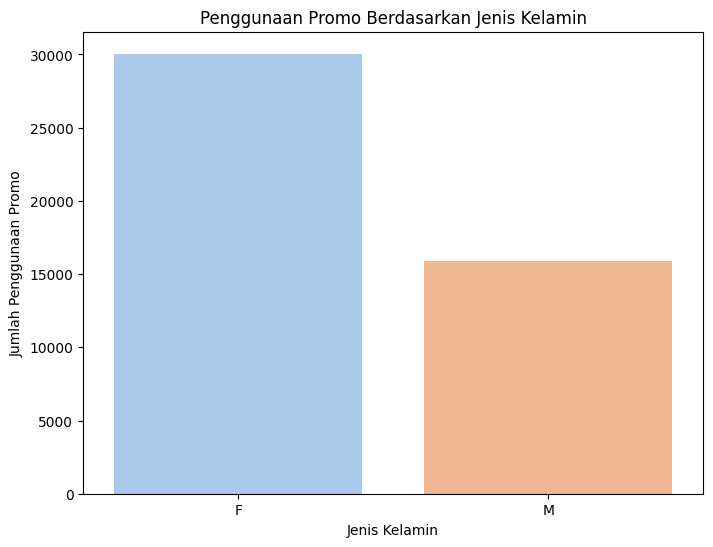

In [ ]:
# Menggabungkan DataFrame df_customer dan df_transactions berdasarkan customer_id
merged_df = df_transactions.merge(df_customer[['customer_id', 'gender']], on='customer_id', how='left')

# Menghitung jumlah penggunaan promo berdasarkan jenis kelamin
promo_by_gender = merged_df[merged_df['promo_code'].notnull()].groupby('gender')['promo_code'].count()

# Memvisualisasikan penggunaan promo berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.barplot(x=promo_by_gender.index, y=promo_by_gender.values, palette='pastel')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penggunaan Promo')
plt.title('Penggunaan Promo Berdasarkan Jenis Kelamin')
plt.show()


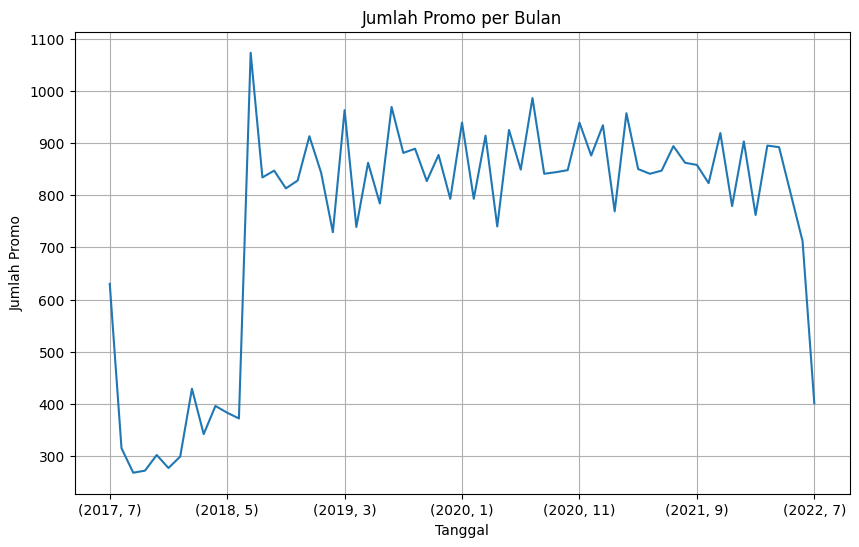

In [ ]:
# Konversi kolom 'created_at' ke tipe datetime
df_transactions['created_at'] = pd.to_datetime(df_transactions['created_at'])

# Ekstrak bulan dan tahun dari 'created_at'
df_transactions['bulan'] = df_transactions['created_at'].dt.month
df_transactions['tahun'] = df_transactions['created_at'].dt.year

# Menghitung jumlah promo per bulan
promo_per_bulan = df_transactions.groupby(['tahun', 'bulan'])['promo_code'].count()

# Membuat plot
plt.figure(figsize=(10, 6))
promo_per_bulan.plot(kind='line')
plt.title('Jumlah Promo per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Promo')
plt.grid(True)
plt.show()


In [ ]:
# df_customer['umur'] = 2022-df_customer['birthdate'].dt.year
# sns.distplot(df_customer['umur'])
# plt.xlabel("umur customer")
# plt.show()

In [ ]:
# plt.figure(figsize=(8,6))
# plt.pie(df_click_stream["traffic_source"].value_counts(),
#         autopct="%1.1f%%",
#         labels=df_click_stream['traffic_source'].value_counts().index)
# plt.title("Persentase Traffic Source")
# plt.show()

In [ ]:
# x = ["Female", "Male"]
# a = df_customer[df_customer["gender"] == "F"]["gender"].count()
# b = df_customer[df_customer["gender"] == "M"]["gender"].count()
# y = np.array([a, b])
# plt.figure(figsize=(8,6))
# bar_colors = ['tab:blue', 'tab:red']
# plt.pie(y, labels = x, colors = bar_colors, autopct='%1.1f%%')
# plt.title("Persentase Gender Customer")
# plt.show()

In [ ]:
# plt.figure(figsize=(8,6))
# plt.pie(df_customer['device_type'].value_counts(),
#         autopct="%1.1f%%",
#         labels=df_customer['device_type'].value_counts().index)
# plt.title("Persentase Tipe Device Customer")
# plt.show()

In [ ]:
# # transactions by promo usage
# x = success['created_at'].nunique()
# y = success['promo_code'].value_counts().sum()
# z = x-y

# print('Jumlah Transaksi:', x)
# print('1. Dengan promo:', y)
# print('2. Tanpa promo:', z)

# x = ["Dengan promo", "Tanpa promo"]
# y = np.array([y, z])
# bar_colors = ['tab:green', 'tab:red']

# plt.figure(figsize=(8,6))
# plt.pie(y, labels = x, colors = bar_colors, autopct='%1.1f%%')
# plt.title('Jumlah Transaksi')
# plt.show()

In [ ]:
# # transactions by promo_code usage
# success['promo_code'].value_counts().sort_values().plot(kind='barh')

In [ ]:
# # promo amount vs promo code vs promo usage
# promo = df_transactions.groupby(['promo_code', 'promo_amount']).agg(
#     promo_code_usage = pd.NamedAgg(column = 'promo_code', aggfunc = len))  # membuat kolom baru
# promo.reset_index(inplace=True)

# sns.relplot(
#     data=promo, x="promo_amount", y="promo_code_usage", hue='promo_code',
#     size="promo_code",
#     sizes=(20, 200),
#     kind="scatter")

In [ ]:
# # transactions by created_at
# date = success.copy()
# date['created_at'] = date['created_at'].astype('datetime64')
# date['year_transaction'] = date['created_at'].dt.year # partisi berdasarkan year
# date['month_transaction'] = date['created_at'].dt.month # partisi bedasarkan month

# month = date.groupby(['year_transaction', 'month_transaction']).agg(
#     customers_transaction = pd.NamedAgg(column = 'month_transaction', aggfunc = sum))  # membuat kolom customers_transaction
# month.reset_index(inplace=True)

# sns.set(rc={"figure.figsize":(9, 4)})
# sns.lineplot(data=month, x="month_transaction", y="customers_transaction", hue="year_transaction", palette="crest")

In [ ]:
# # booking tiap customer
# booking = success.groupby(['customer_id']).agg(
#     customer_booking = pd.NamedAgg(column = 'booking_id', aggfunc = len))  # membuat kolom baru
# booking.reset_index(inplace=True)

# print(booking['customer_booking'].describe().round(0))
# sns.displot(booking, x="customer_booking", binwidth=18)

In [ ]:
# # shipment fee
# print(success['shipment_fee'].describe().round(0))
# sns.displot(success, x="shipment_fee")

In [ ]:
# success = df_transactions.copy()
# success = df_transactions[df_transactions['payment_status'] == 'Success']

# product_transactions = success.merge(df_product, how='left', on='product_id') # merge column transactions dan products
# season = product_transactions.groupby('season')['quantity'].sum()
# plt.figure(figsize=(8,6))
# plt.pie(season.sort_values(ascending=False),
#         autopct="%1.1f%%",
#         labels=season.sort_values(ascending=False).index)
# plt.title("Persentase Periode dengan Penjualan Terlaris")
# plt.show()

# EDA Bisnis & Statistik

In [ ]:
df_zeus.tail(50)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
45893,2019-10-17T18:36:12.122912Z,47779,46ab60aa-1939-4905-bdb2-fe176279ebd5,9ee6a01e-177f-4037-b423-5382d7961733,Credit Card,Success,10870,SC2022,0,2019-10-19T16:16:08.564642Z,-3.55,102.14,242491.00,51023,1,253361,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Innerwear,Bra,Pink,Summer,2017.00,Casual,Enamor Blush Coloured Bra
45894,2019-11-09T19:35:19.122912Z,47779,76d40aca-28b1-4b3b-8f9a-7ee7d698fc65,3f943719-38b7-4ccd-8090-a53406d8e2c1,Credit Card,Success,0,None,10000,2019-11-14T09:19:26.693997Z,-2.29,110.41,488146.00,1948,1,194855,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Men,Apparel,Topwear,Tshirts,Black,Fall,2010.00,Casual,Puma Mens Keyboard Sidebar Black Polo T-shirt
45895,2019-11-09T19:35:19.122912Z,47779,76d40aca-28b1-4b3b-8f9a-7ee7d698fc65,3f943719-38b7-4ccd-8090-a53406d8e2c1,Credit Card,Success,0,None,10000,2019-11-14T09:19:26.693997Z,-2.29,110.41,488146.00,2852,1,283291,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011.00,Casual,Mr.Men Men's What Me Rude Blue T-shirt
45896,2019-12-02T19:19:48.122912Z,47779,ab2e5612-4058-4dd7-a1cf-b8b9e3fb74cc,abae2dfa-db7f-4b1f-a60d-4e55445df4a6,Credit Card,Success,2202,BUYMORE,10000,2019-12-06T10:45:14.016412Z,-8.21,112.84,191207.00,3209,1,183409,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Tshirts,Purple,Summer,2011.00,Casual,Tantra Women's Prism Purple T-shirt
45897,2019-12-25T19:24:17.122912Z,47779,91108ece-c4d2-4893-9335-a0606b053418,5ab44f3c-1b40-4888-a160-c63412136379,Credit Card,Failed,0,None,50000,2019-12-27T14:57:59.182325Z,0.30,100.50,527574.00,37713,1,477574,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Men,Apparel,Topwear,Tshirts,Maroon,Summer,2012.00,Casual,John Players Men Polo Maroon T-shirt
45898,2020-01-17T18:52:14.122912Z,47779,88e5347b-2e05-45d8-8a6d-758ae6f75350,f354b497-232f-4598-a6d5-d1a9127a62e3,Credit Card,Success,3367,AZ2022,15000,2020-01-22T02:40:38.258794Z,-6.76,107.45,2804621.00,20020,11,253908,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Men,Apparel,Topwear,Shirts,Blue,Summer,2011.00,Casual,United Colors Of Benetton Men Blue Check Shirt
45899,2020-02-09T18:55:22.122912Z,47779,44bbbfe3-4075-4b56-8823-df211228a02d,bbd68166-3134-46a8-9f08-e24e397f1142,Credit Card,Success,3404,LIBURDONG,10000,2020-02-15T04:10:55.137342Z,-8.09,115.14,227251.00,38181,1,220655,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c

In [ ]:
df_zeus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45943 entries, 0 to 45942
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              45943 non-null  object 
 1   customer_id             45943 non-null  int64  
 2   booking_id              45943 non-null  object 
 3   session_id              45943 non-null  object 
 4   payment_method          45943 non-null  object 
 5   payment_status          45943 non-null  object 
 6   promo_amount            45943 non-null  int64  
 7   promo_code              45943 non-null  object 
 8   shipment_fee            45943 non-null  int64  
 9   shipment_date_limit     45943 non-null  object 
 10  shipment_location_lat   45943 non-null  float64
 11  shipment_location_long  45943 non-null  float64
 12  total_amount            45943 non-null  float64
 13  product_id              45943 non-null  int64  
 14  quantity                45943 non-null

In [ ]:
import pandas as pd

# Menggantikan 'df' dengan nama dataframe yang sesuai
unique_payment_status = df_zeus['payment_status'].unique()
print(unique_payment_status)


['Success' 'Failed']


In [ ]:
import pandas as pd

# Menggantikan 'df' dengan nama dataframe yang sesuai
payment_status_counts = df_zeus['payment_status'].value_counts()
print(payment_status_counts)


Success    43949
Failed      1994
Name: payment_status, dtype: int64


In [ ]:
#What was the total revenue?
Sum_revenue=df_zeus.total_amount.sum()
print ('Total Revenue:\n','Rp ', round(Sum_revenue,2))

Total Revenue:
 Rp  53140471328.0


###### Total Revenue With Succes Payment

In [ ]:
# Melakukan filter pada DataFrame untuk transaksi dengan payment_status = Success
success_transactions = df_zeus[df_zeus['payment_status'] == 'Success']

# Menghitung total revenue dari transaksi sukses
total_revenue_success = success_transactions['total_amount'].sum()

print(f"Total revenue dari transaksi sukses: Rp {total_revenue_success}")


Total revenue dari transaksi sukses: Rp 50775324742.0


##### In which months the sales were higher?

In [ ]:
import pandas as pd

# Misalkan 'df' adalah DataFrame Anda dengan kolom 'created_at' yang merupakan tanggal transaksi
# Ubah 'created_at' menjadi tipe data datetime jika belum
df_zeus['created_at'] = pd.to_datetime(df_zeus['created_at'])

# Buat kolom 'transaction_year' untuk menampung informasi tahun transaksi
df_zeus['transaction_year'] = df_zeus['created_at'].dt.year

# Buat kolom 'transaction_month' untuk menampung informasi bulan transaksi
df_zeus['transaction_month'] = df_zeus['created_at'].dt.month

# Tampilkan DataFrame dengan kolom tahun dan bulan transaksi yang baru
print(df_zeus[['created_at', 'transaction_year', 'transaction_month']])


                            created_at  transaction_year  transaction_month
0     2018-07-29 15:22:01.458193+00:00              2018                  7
1     2018-07-30 12:40:22.365620+00:00              2018                  7
2     2018-09-15 11:51:17.365620+00:00              2018                  9
3     2018-11-01 11:23:48.365620+00:00              2018                 11
4     2018-12-18 11:20:30.365620+00:00              2018                 12
...                                ...               ...                ...
45938 2021-11-14 20:49:59.122912+00:00              2021                 11
45939 2021-12-07 20:31:11.122912+00:00              2021                 12
45940 2021-12-30 20:44:59.122912+00:00              2021                 12
45941 2022-01-22 20:50:31.122912+00:00              2022                  1
45942 2022-02-14 20:51:24.122912+00:00              2022                  2

[45943 rows x 3 columns]


In [ ]:
import pandas as pd

# Misalkan 'df' adalah DataFrame Anda dengan kolom 'total_amount', 'transaction_year', dan 'transaction_month'
# Lakukan perhitungan total amount berdasarkan group transaction_year dan transaction_month
result = df_zeus.groupby(['transaction_year', 'transaction_month'])['total_amount'].sum().reset_index()

# Tampilkan hasil perhitungan total amount
result


,transaction_year,transaction_month,total_amount
0,2017,7,536487943.00
1,2017,8,699544792.00
2,2017,9,261427144.00
3,2017,10,220776061.00
4,2017,11,327439908.00
...,...,...,...
56,2022,3,1450529588.00
57,2022,4,1294289421.00
58,2022,5,801217952.00
59,2022,6,851285668.00


In [ ]:
import pandas as pd

# Misalkan 'df' adalah DataFrame Anda dengan kolom 'total_amount', 'transaction_year', dan 'transaction_month'
# Lakukan perhitungan total amount berdasarkan group transaction_year dan transaction_month
result = df_zeus.groupby(['transaction_year', 'transaction_month'])['total_amount'].sum().reset_index()

# Urutkan hasil berdasarkan total amount secara menurun
sorted_result = result.sort_values(by='total_amount', ascending=False)

# Tampilkan urutan bulan dengan total amount tertinggi
print("Urutan bulan dengan total amount tertinggi:")
print(sorted_result[['transaction_year', 'transaction_month', 'total_amount']])


Urutan bulan dengan total amount tertinggi:
    transaction_year  transaction_month  total_amount
25              2019                  8 1520427149.00
13              2018                  8 1465678736.00
56              2022                  3 1450529588.00
24              2019                  7 1449031459.00
42              2021                  1 1365440772.00
..               ...                ...           ...
8               2018                  3  314912895.00
6               2018                  1  290933069.00
2               2017                  9  261427144.00
3               2017                 10  220776061.00
5               2017                 12  192643819.00

[61 rows x 3 columns]


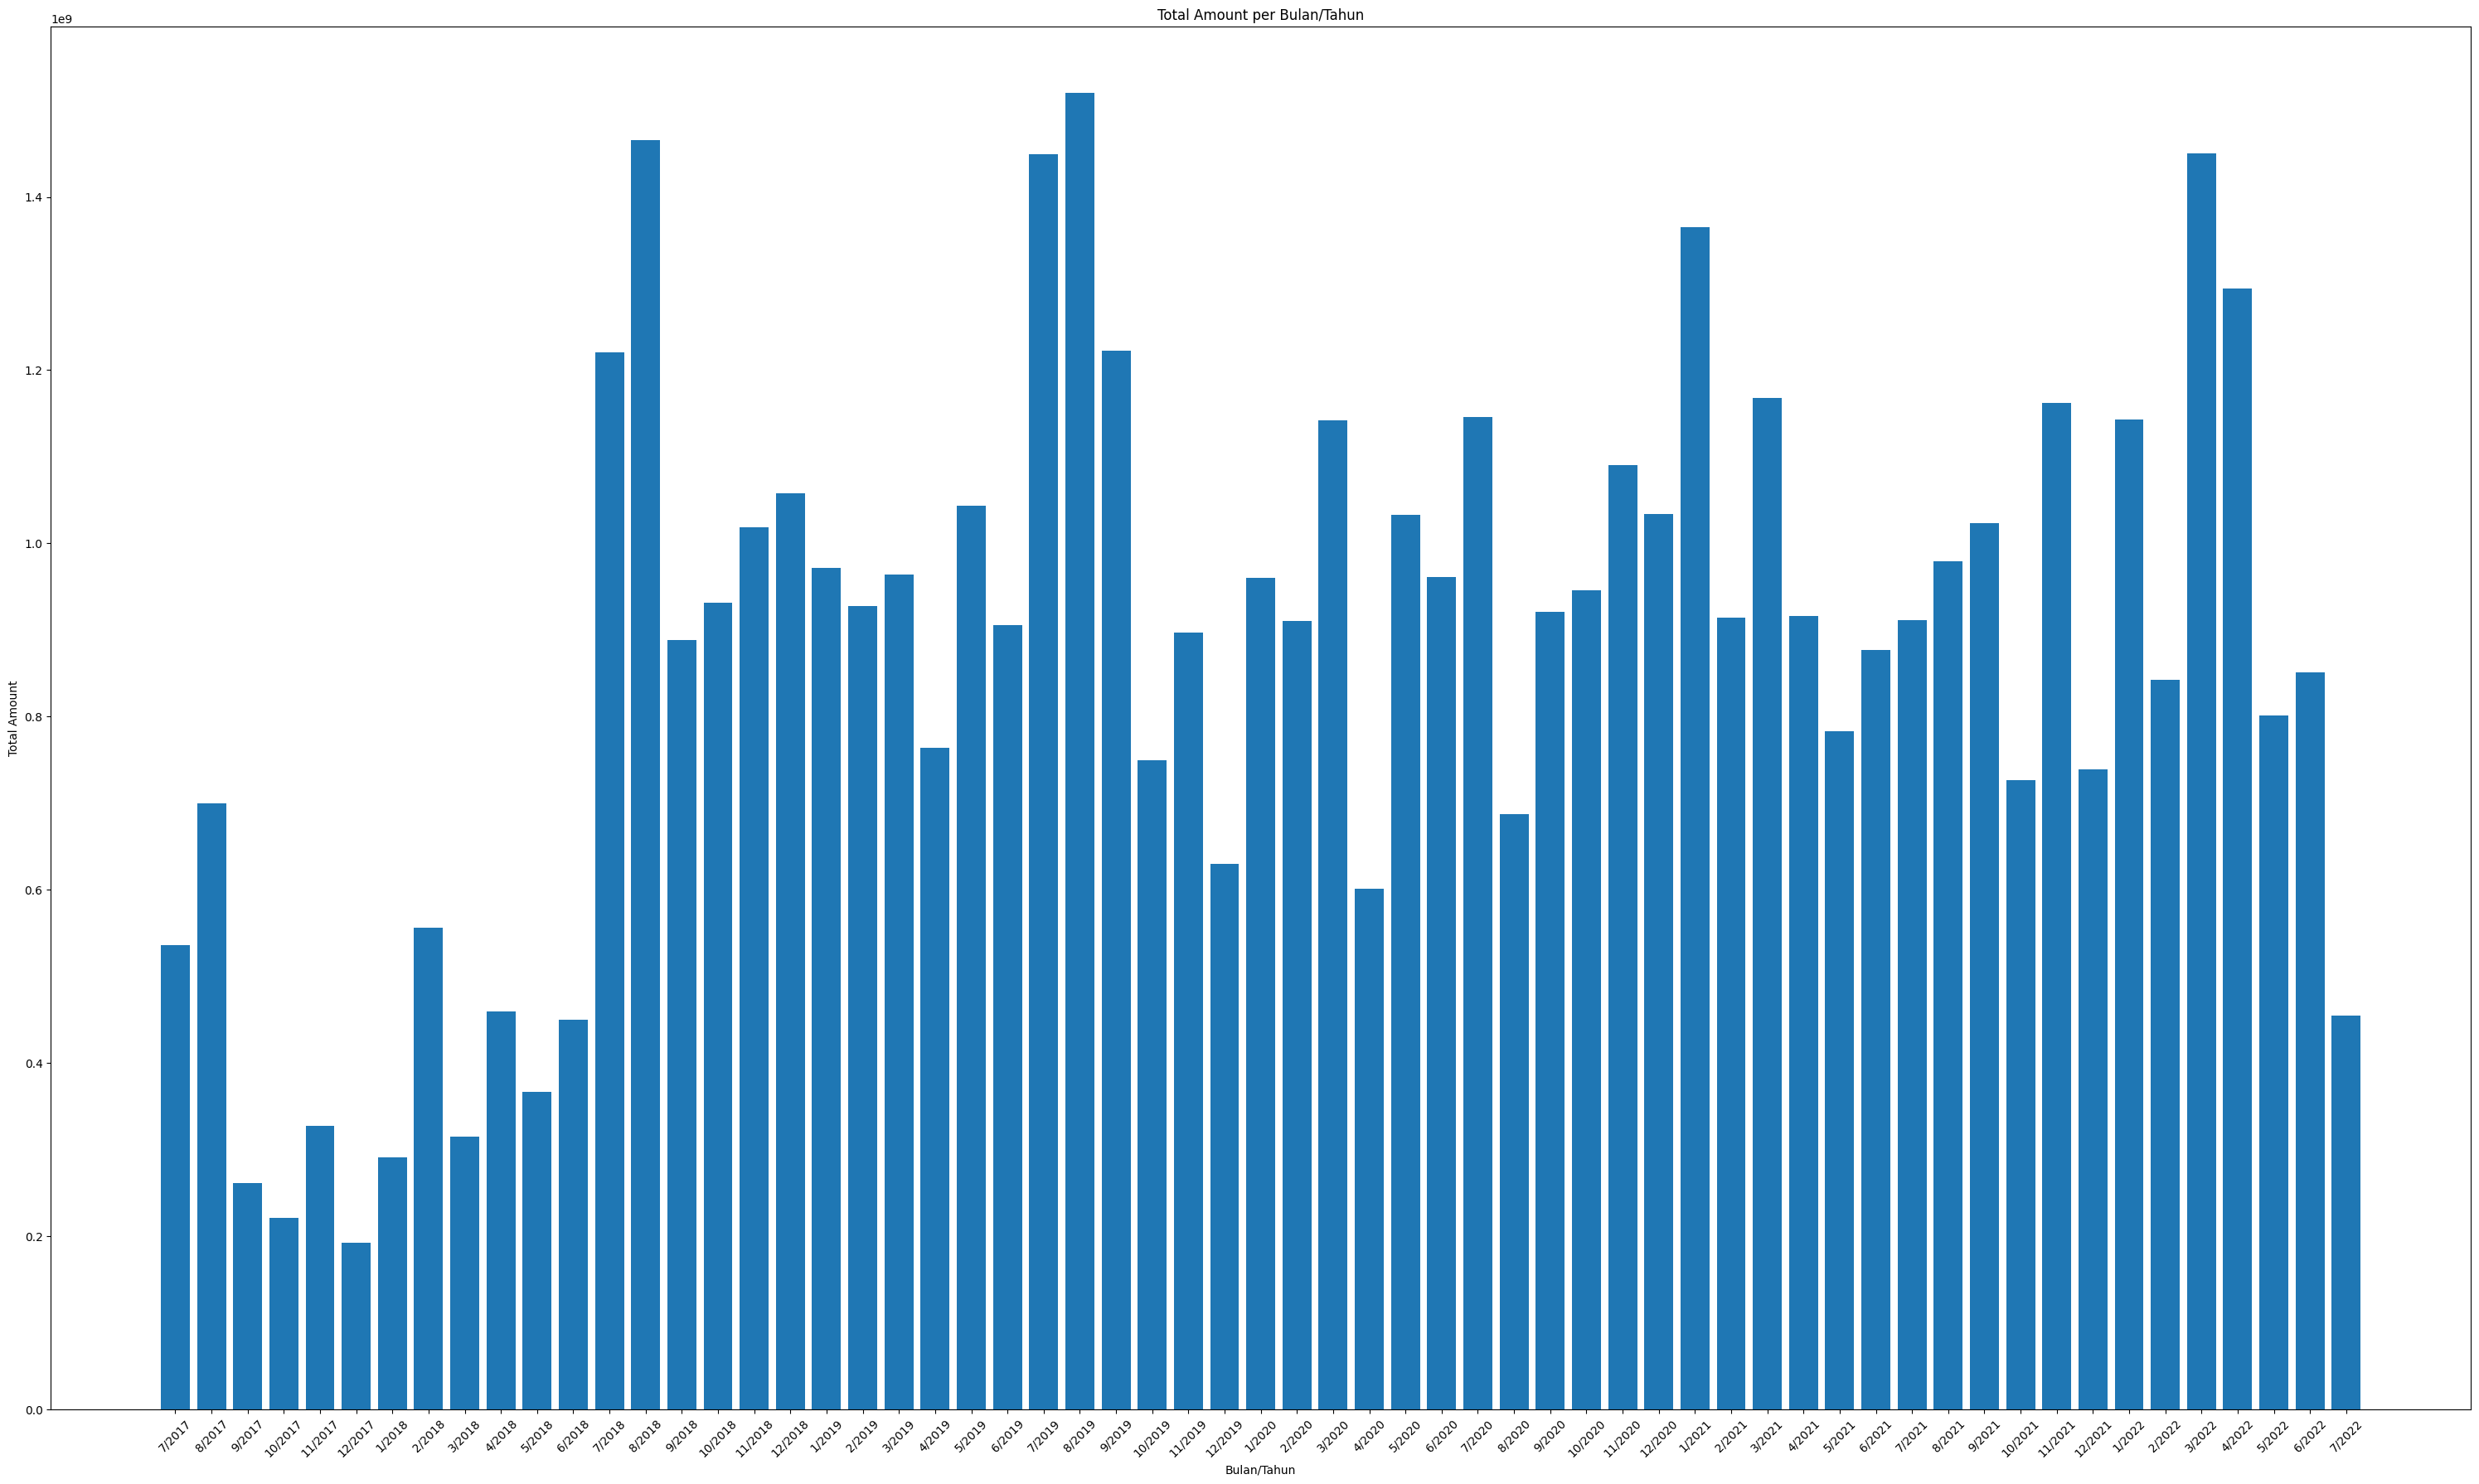

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan 'df' adalah DataFrame Anda dengan kolom 'total_amount', 'transaction_year', dan 'transaction_month'
# Lakukan perhitungan total amount berdasarkan group transaction_year dan transaction_month
result = df_zeus.groupby(['transaction_year', 'transaction_month'])['total_amount'].sum().reset_index()

# Urutkan hasil berdasarkan total amount secara menurun
sorted_result = result.sort_values(by='total_amount', ascending=False)

# Visualisasi urutan bulan dengan total amount tertinggi
plt.figure(figsize=(30, 18))
plt.bar(sorted_result.index, sorted_result['total_amount'])
plt.xticks(sorted_result.index, sorted_result['transaction_month'].astype(str) + '/' + sorted_result['transaction_year'].astype(str), rotation=45)
plt.xlabel('Bulan/Tahun')
plt.ylabel('Total Amount')
plt.title('Total Amount per Bulan/Tahun')
plt.tight_layout()
plt.show()



##### What products are the top 5 in sales?

In [ ]:
import pandas as pd

# Misalkan 'df' adalah DataFrame Anda dengan kolom 'total_amount', 'product_id', dan 'productDisplayName'
# Lakukan perhitungan total amount berdasarkan group product_id
product_revenue = df_zeus.groupby('product_id').agg({'total_amount': 'sum', 'productDisplayName': 'first'}).reset_index()

# Temukan 5 produk dengan total amount tertinggi
top_5_products = product_revenue.nlargest(5, 'total_amount')

# Tampilkan 5 produk dengan total amount tertinggi beserta nama produknya
print("5 Produk dengan total amount tertinggi:")
print(top_5_products[['product_id', 'productDisplayName', 'total_amount']])


5 Produk dengan total amount tertinggi:
       product_id                                 productDisplayName  \
19742       40597                          Aurelia Women Green Kurti   
7373        15123                      Arrow Men Solid Grey Trousers   
18134       37232  United Colors of Benetton Men Leather Brown Wa...   
12532       25378                  Levis Men Beige Innerwear T-shirt   
19730       40579                            W Women Navy Blue Kurta   

       total_amount  
19742   22521376.00  
7373    21969625.00  
18134   20930310.00  
12532   19432119.00  
19730   19253555.00  


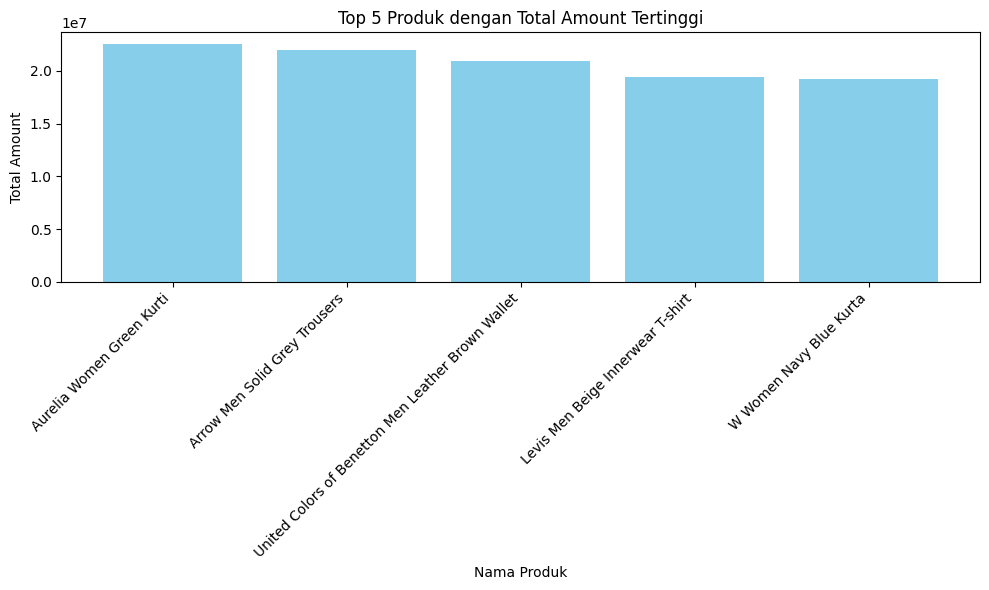

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan 'df' adalah DataFrame Anda dengan kolom 'total_amount', 'product_id', dan 'productDisplayName'
# Lakukan perhitungan total amount berdasarkan group product_id
product_revenue = df_zeus.groupby('product_id').agg({'total_amount': 'sum', 'productDisplayName': 'first'}).reset_index()

# Temukan 5 produk dengan total amount tertinggi
top_5_products = product_revenue.nlargest(5, 'total_amount')

# Visualisasi 5 produk dengan total amount tertinggi
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['productDisplayName'], top_5_products['total_amount'], color='skyblue')
plt.xlabel('Nama Produk')
plt.ylabel('Total Amount')
plt.title('Top 5 Produk dengan Total Amount Tertinggi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### What is the top 5 countries that purchesed the most?

In [ ]:
# Grouping by country and summing up the total purchases for each country
country_purchases = df_zeus.groupby('home_country')['total_amount'].sum().reset_index()

# Sorting the countries based on total purchases in descending order
top_5_countries = country_purchases.sort_values(by='total_amount', ascending=False).head(5)

print("Top 5 countries with the most purchases:")
print(top_5_countries)


Top 5 countries with the most purchases:
  home_country   total_amount
0    Indonesia 53140471328.00


In [ ]:
# Melihat nilai unik dari fitur home_country
unique_countries = df_zeus['home_country'].unique()

print("Nilai unik dari fitur home_country:")
print(unique_countries)


Nilai unik dari fitur home_country:
['Indonesia']


Pembeli hanya dari indoensia

# **3. Feature Engineering**

In [ ]:
df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summer,2011.00,Ethnic,W Women Printed Pink Kurtas,2021,11
45939,2021-12-07 20:31:11.122912+00:00,47779,2514d4ae-1a8b-4f09-a94f-9647a26609e5,a41cc05a-f279

In [ ]:
df_zeus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45943 entries, 0 to 45942
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              45943 non-null  datetime64[ns, UTC]
 1   customer_id             45943 non-null  int64              
 2   booking_id              45943 non-null  object             
 3   session_id              45943 non-null  object             
 4   payment_method          45943 non-null  object             
 5   payment_status          45943 non-null  object             
 6   promo_amount            45943 non-null  int64              
 7   promo_code              45943 non-null  object             
 8   shipment_fee            45943 non-null  int64              
 9   shipment_date_limit     45943 non-null  object             
 10  shipment_location_lat   45943 non-null  float64            
 11  shipment_location_long  45943 non-null  f

### Age

In [ ]:
import pandas as pd
from datetime import datetime

# Misalkan Anda memiliki DataFrame 'df' dengan kolom 'birthdate'
# Ubah 'birthdate' menjadi tipe data datetime jika belum
df_zeus['birthdate'] = pd.to_datetime(df_zeus['birthdate'])

# Hitung usia berdasarkan tanggal lahir
today = datetime.now()
df_zeus['age'] = (today - df_zeus['birthdate']).astype('<m8[Y]').astype(int)  # Menghitung selisih tahun

# Tampilkan DataFrame yang telah diupdate
df_zeus


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summer,2011.00,Ethnic,W Women Printed Pink Kurtas,2021,11,17
45939,2021-12-07 20:31:11.122912+00:00,47779,2514d4ae-1a8b-4f09-a94f-

### Flag

In [ ]:
# Membuat kolom 'Flag Promo' yang berisi 1 jika promo_code bukan 'None' dan 0 jika 'None'
df_zeus['Flag Promo'] = (df_zeus['promo_code'] != 'None').astype(int)

df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summer,2011.00,Ethnic,W Women Printed Pink Kurtas,2021,11,17,0
45939,2021-12-07 20:31:11.122912+00:00,477

In [ ]:
df_zeus.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0


### BURN RATE

In [ ]:
import pandas as pd

# Hitung burn rate percentage
df_zeus['burn_rate_percentage'] = (df_zeus['promo_amount'] / df_zeus['total_amount']) * 100

# Tampilkan hasil
df_zeus


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1,0.71
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0,0.00
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0,0.00
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0,0.00
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summer,2011.00,Ethnic,W Women Printed Pink Kurtas,2021,

Semakin tinggi Burn rate , maka semakin jelek

### **Z-Score**

**Hitung z-score dari Burn Rate**

In [ ]:
from scipy import stats

# Misalnya burn_rates adalah kumpulan burn rate
burn_rates = df_zeus['burn_rate_percentage']

# Hitung Z-Score dari burn_rates
z_scores = stats.zscore(burn_rates)

# Tambahkan kolom 'burn_rate_zscore' ke dataframe df_zeus
df_zeus['burn_rate_zscore'] = z_scores


In [ ]:
std_burn_rate = df_zeus['burn_rate_percentage'].std()
print(std_burn_rate)

1.3886452147801633


In [ ]:
df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1,0.71,0.05
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0,0.00,-0.46
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0,0.00,-0.46
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0,0.00,-0.46
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0,0.00,-0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summe

In [ ]:
df_zeus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45943 entries, 0 to 45942
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              45943 non-null  datetime64[ns, UTC]
 1   customer_id             45943 non-null  int64              
 2   booking_id              45943 non-null  object             
 3   session_id              45943 non-null  object             
 4   payment_method          45943 non-null  object             
 5   payment_status          45943 non-null  object             
 6   promo_amount            45943 non-null  int64              
 7   promo_code              45943 non-null  object             
 8   shipment_fee            45943 non-null  int64              
 9   shipment_date_limit     45943 non-null  object             
 10  shipment_location_lat   45943 non-null  float64            
 11  shipment_location_long  45943 non-null  f

In [ ]:
df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1,0.71,0.05
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0,0.00,-0.46
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0,0.00,-0.46
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0,0.00,-0.46
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0,0.00,-0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summe

In [ ]:
df_zeus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45943 entries, 0 to 45942
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              45943 non-null  datetime64[ns, UTC]
 1   customer_id             45943 non-null  int64              
 2   booking_id              45943 non-null  object             
 3   session_id              45943 non-null  object             
 4   payment_method          45943 non-null  object             
 5   payment_status          45943 non-null  object             
 6   promo_amount            45943 non-null  int64              
 7   promo_code              45943 non-null  object             
 8   shipment_fee            45943 non-null  int64              
 9   shipment_date_limit     45943 non-null  object             
 10  shipment_location_lat   45943 non-null  float64            
 11  shipment_location_long  45943 non-null  f

In [ ]:
# # Drop useless column
# master_dataset.drop(columns=['session_id','product_id', 'session_id'], inplace=True)

In [ ]:
# # Menentukan fitur-fitur yang akan digunakan
# selected_features = ['payment_method', 'promo_amount', 'shipment_fee', 'total_amount',
#                      'masterCategory', 'subCategory', 'articleType', 'traffic_source',
#                      'gender_x', 'birthdate', 'event_name', 'event_time', 'event_id',
#                      'first_join_date', 'home_location_lat', 'home_location_long', 'home_country',
#                      'payment_status', 'promo_code', 'quantity', 'item_price',
#                      'gender_x', 'masterCategory', 'subCategory', 'articleType',
#                      'baseColour', 'season', 'year', 'usage', 'productDisplayName',
#                      'Flag Promo', 'burn_rate_percentage', 'burn_rate_zscore'
#                      ]

# # Membuat DataFrame baru dengan fitur-fitur yang telah diperbarui
# df_feature = df_zeus[selected_features].copy()

# # 'search_keywords'


In [ ]:
# df_feature.tail(20)

In [ ]:
# df_feature.info()

In [ ]:
df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1,0.71,0.05
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0,0.00,-0.46
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0,0.00,-0.46
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0,0.00,-0.46
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0,0.00,-0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Topwear,Kurtas,Pink,Summe

In [ ]:
df_zeus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45943 entries, 0 to 45942
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              45943 non-null  datetime64[ns, UTC]
 1   customer_id             45943 non-null  int64              
 2   booking_id              45943 non-null  object             
 3   session_id              45943 non-null  object             
 4   payment_method          45943 non-null  object             
 5   payment_status          45943 non-null  object             
 6   promo_amount            45943 non-null  int64              
 7   promo_code              45943 non-null  object             
 8   shipment_fee            45943 non-null  int64              
 9   shipment_date_limit     45943 non-null  object             
 10  shipment_location_lat   45943 non-null  float64            
 11  shipment_location_long  45943 non-null  f

# Heatmamp & VIF (Feature Selction)

Pemilihan Fitur-fitur yang memiliki korelasi tinggi dengan variabel target atau dengan diskon/penawaran khusus bisa menjadi kandidat yang baik.

<ipython-input-232-80e8f5a35f61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_zeus.corr()


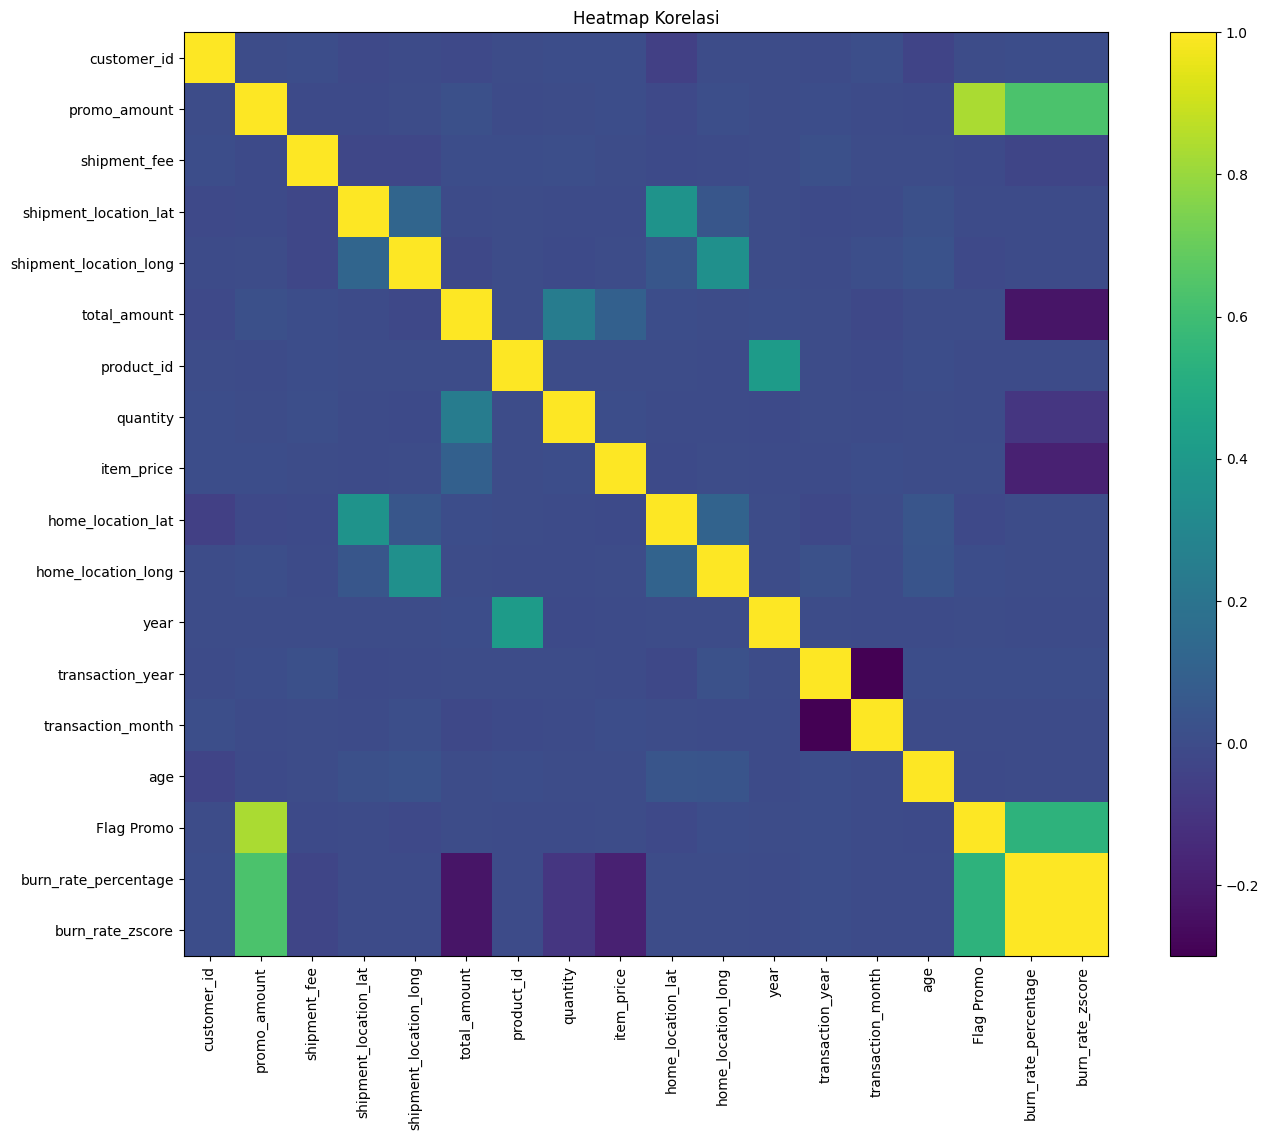

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df_zeus.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))  # Ukuran heatmap
plt.title('Heatmap Korelasi')

# Menggambar heatmap
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Menambahkan colorbar

# Menampilkan label sumbu x dan y
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation='vertical')
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()


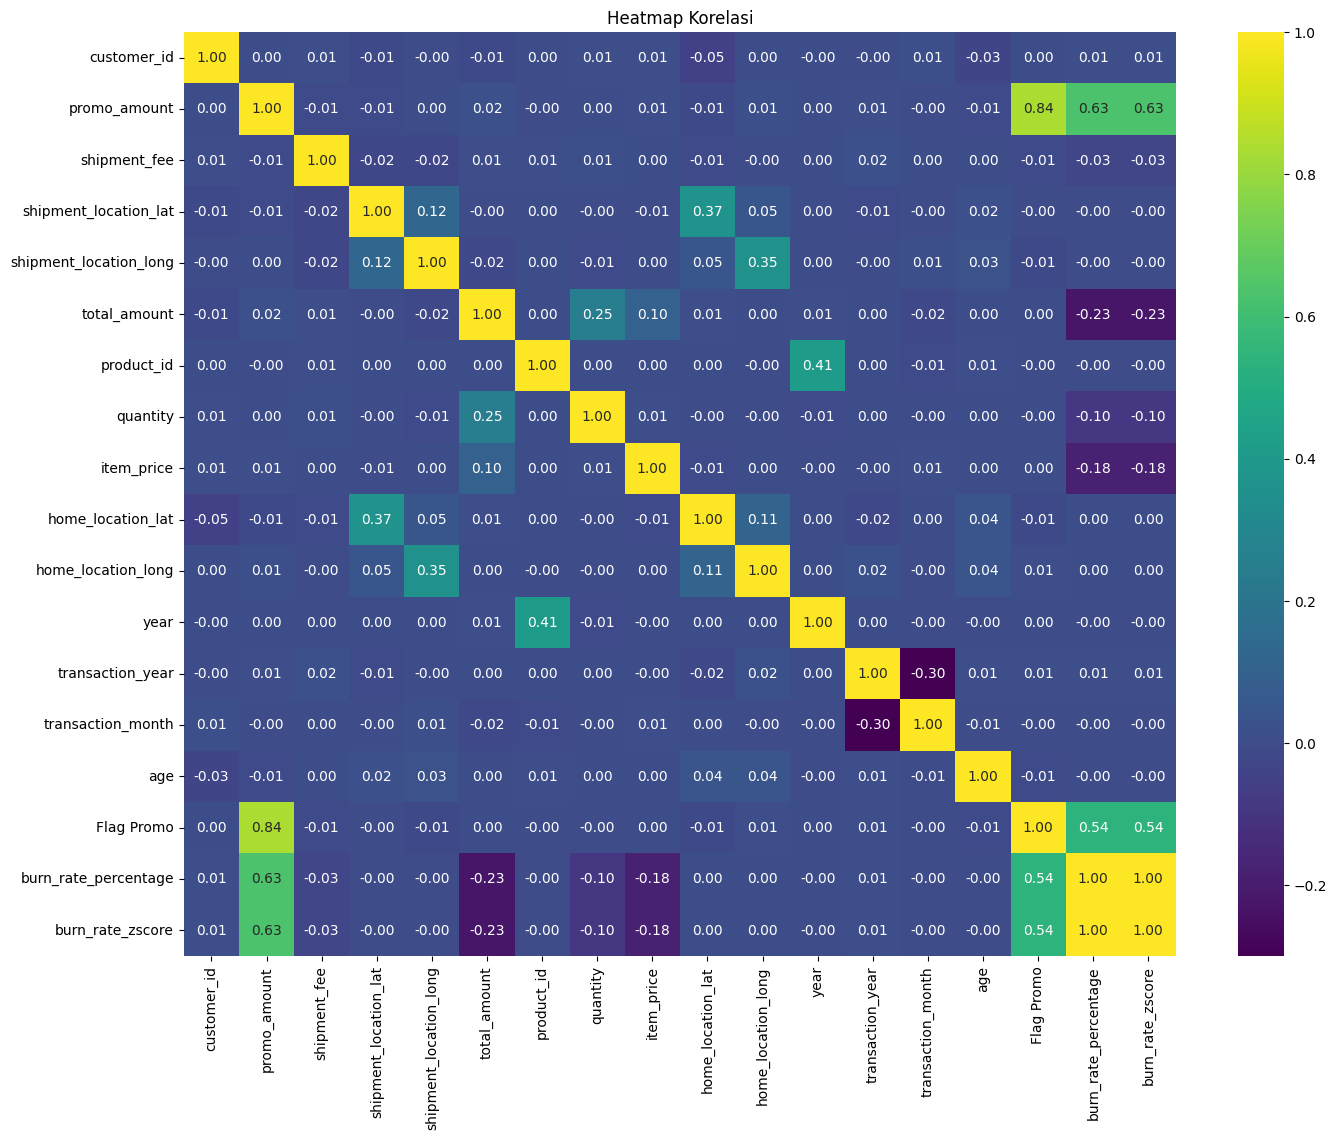

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))  # Ukuran heatmap
plt.title('Heatmap Korelasi')

# Menggambar heatmap dengan angka korelasi
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

plt.show()


In [ ]:
import pandas as pd

# Menentukan variabel target (misalnya, Pembelian_Saat_Diskon)
target_variable = 'burn_rate_zscore'

# Menghitung korelasi antara fitur-fitur numerik dengan variabel target
correlations_with_target = df_zeus.corr()[target_variable].sort_values(ascending=False)
print(correlations_with_target)


burn_rate_zscore          1.00
burn_rate_percentage      1.00
promo_amount              0.63
Flag Promo                0.54
customer_id               0.01
transaction_year          0.01
home_location_lat         0.00
home_location_long        0.00
shipment_location_lat    -0.00
product_id               -0.00
age                      -0.00
year                     -0.00
shipment_location_long   -0.00
transaction_month        -0.00
shipment_fee             -0.03
quantity                 -0.10
item_price               -0.18
total_amount             -0.23
Name: burn_rate_zscore, dtype: float64


<ipython-input-234-6da7cf37480f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_target = df_zeus.corr()[target_variable].sort_values(ascending=False)


# Uji Features dengan VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_percentage', 'promo_amount', 'quantity','item_price', 'total_amount']  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df_zeus[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

               Features  VIF  Tolerance
0  burn_rate_percentage 2.17       0.46
1          promo_amount 2.71       0.37
2              quantity 1.79       0.56
3            item_price 2.13       0.47
4          total_amount 1.69       0.59


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_zscore', 'promo_amount', 'Flag Promo', 'quantity','item_price', 'total_amount']  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df_zeus[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

           Features  VIF  Tolerance
0  burn_rate_zscore 1.93       0.52
1      promo_amount 6.20       0.16
2        Flag Promo 5.63       0.18
3          quantity 1.79       0.56
4        item_price 2.47       0.41
5      total_amount 1.71       0.58


Eleminasi Features yang memiliki VIF besar dan Tolerance yang Kecil

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_zscore', 'Flag Promo', 'quantity','item_price', 'total_amount']  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df_zeus[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

           Features  VIF  Tolerance
0  burn_rate_zscore 1.58       0.63
1        Flag Promo 2.40       0.42
2          quantity 1.79       0.56
3        item_price 2.43       0.41
4      total_amount 1.68       0.59


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_zscore', 'promo_amount', 'quantity','item_price', 'total_amount']  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df_zeus[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

           Features  VIF  Tolerance
0  burn_rate_zscore 1.93       0.52
1      promo_amount 2.64       0.38
2          quantity 1.79       0.56
3        item_price 2.34       0.43
4      total_amount 1.71       0.58


# Modeling

Analisis Tingkat Efektivitas Penggunaan Kode Promo terhadap Peningkatan Penjualan dengan Menggunakan Metode Z-Score.

Tujuan Clustering adalah Segmentasi Pengguna:

Melalui K-Means atau metode clustering lainnya, membagi pengguna menjadi kelompok berdasarkan pola penggunaan kode promo dan tingkat efektivitasnya terhadap peningkatan penjualan. Ini dapat membantu untuk memahami kelompok-kelompok pengguna yang memiliki kecenderungan yang serupa dalam memanfaatkan kode promo.

Tujuan:
- Mengidentifikasi dan memahami kelompok pengguna yang paling efektif dalam memanfaatkan diskon atau penawaran khusus. Hal ini dilakukan dengan menggunakan berbagai metode clustering (seperti K-Means, K-Prototypes, K-Modes) dan model SVM untuk memisahkan pengguna berdasarkan pola penggunaan diskon.

Dengan demikian, bisnis dapat fokus pada strategi pemasaran yang lebih terarah untuk meningkatkan efektivitas diskon pada kelompok-kelompok yang tepat.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

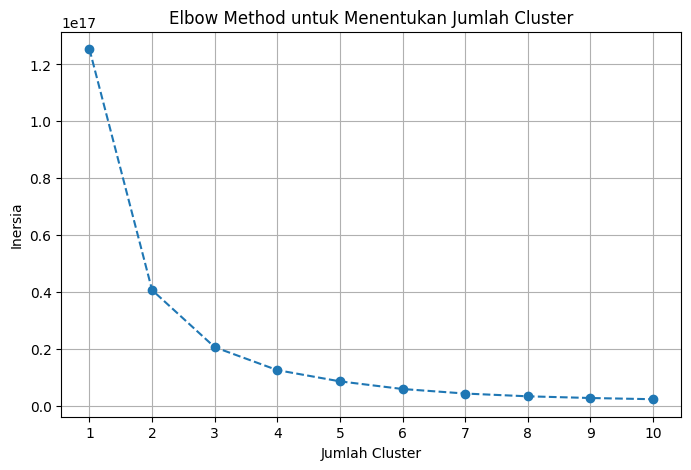

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Memuat data dan mengambil fitur yang akan digunakan
features = df_zeus[['burn_rate_zscore', 'promo_amount', 'quantity', 'item_price', 'total_amount']]

# Menyimpan inersia untuk setiap jumlah klaster
inertia = []
for k in range(1, 11):  # Coba jumlah klaster dari 1 hingga 10 (bisa disesuaikan)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Memuat data dan mengambil fitur yang akan digunakan
features = df_zeus[['burn_rate_percentage', 'promo_amount', 'quantity', 'item_price', 'total_amount']]

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan (misalnya, 3 klaster)
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan clustering
kmeans.fit(features)

# Menambahkan label klaster ke dalam data
df_zeus['Cluster'] = kmeans.labels_

# Eksplorasi hasil clustering
cluster_summary = df_zeus.groupby('Cluster').mean()  # Rata-rata fitur untuk setiap klaster
print(cluster_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         customer_id  promo_amount  shipment_fee  shipment_location_lat  \
Cluster                                                                   
0           50160.77       2256.29       9061.25                  -5.05   
1           48972.01       2408.01       9579.56                  -4.97   
2           51445.94       2405.75       8740.84                  -5.27   

         shipment_location_long  total_amount  product_id  quantity  \
Cluster                                                               
0                        111.21     489418.08    29787.37      1.28   
1                        111.26    2868837.15    29634.81      2.18   
2                        110.60    7042729.47    30057.46      2.39   

         item_price  home_location_lat  home_location_long    year  \
Cluster                                                              
0         246269.48              -4.90              111.48 2012.80   
1         262587.24              -4.98              111.28

<ipython-input-270-ce28f8dc5423>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df_zeus.groupby('Cluster').mean()  # Rata-rata fitur untuk setiap klaster


In [ ]:
df_zeus['Cluster'].value_counts()

0    36410
1     7623
2     1910
Name: Cluster, dtype: int64

In [ ]:
total_booking_count = df_zeus['booking_id'].count()
print("Jumlah total booking_id:", total_booking_count)

Jumlah total booking_id: 45943


In [ ]:
cluster_summary

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,home_location_lat,home_location_long,year,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore
Cluster,,,,,,,,,,,,,,,,,,
0,50160.77,2256.29,9061.25,-5.05,111.21,489418.08,29787.37,1.28,246269.48,-4.90,111.48,2012.80,2019.77,6.50,26.95,0.42,0.79,0.11
1,48972.01,2408.01,9579.56,-4.97,111.26,2868837.15,29634.81,2.18,262587.24,-4.98,111.28,2012.85,2019.79,6.50,26.96,0.44,0.09,-0.40
2,51445.94,2405.75,8740.84,-5.27,110.60,7042729.47,30057.46,2.39,264648.98,-4.63,111.98,2012.82,2019.75,6.22,27.13,0.41,0.04,-0.44


In [ ]:
selected_columns = ['burn_rate_percentage', 'promo_amount', 'quantity', 'item_price', 'total_amount']
selected_cluster_summary = cluster_summary[selected_columns]
selected_cluster_summary


,burn_rate_percentage,promo_amount,quantity,item_price,total_amount
Cluster,,,,,
0,0.79,2256.29,1.28,246269.48,489418.08
1,0.09,2408.01,2.18,262587.24,2868837.15
2,0.04,2405.75,2.39,264648.98,7042729.47


In [ ]:
# Melihat dataset hanya untuk Cluster 0
cluster_0_data = df_zeus[df_zeus['Cluster'] == 0]

# Menampilkan data hasil
cluster_0_data


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore,Cluster
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1,0.71,0.05,0
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0,0.00,-0.46,0
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0,0.00,-0.46,0
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0,0.00,-0.46,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0,0.00,-0.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Top

In [ ]:
# Melihat dataset hanya untuk Cluster 0
cluster_1_data = df_zeus[df_zeus['Cluster'] == 1]

# Menampilkan data hasil
cluster_1_data

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore,Cluster
15,2019-09-26 12:55:16.365620+00:00,4774,2f26f289-62a5-4a3b-84e0-41b2e8b799ac,ad43dd86-0da4-44ec-af00-0cb8d320793b,LinkAja,Success,0,None,10000,2019-09-28T21:49:53.318307Z,-5.20,105.76,1895458.00,24081,6,314243,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Footwear,Shoes,Casual Shoes,Red,Winter,2015.00,Casual,Catwalk Women Red Casual Shoes,2019,9,27,0,0.00,-0.46,1
18,2020-02-14 11:48:03.365620+00:00,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,Credit Card,Success,0,None,10000,2020-02-18T19:40:48.027858Z,-0.70,112.15,2108413.00,35062,1,367216,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Accessories,Belts,Belts,Yellow,Summer,2012.00,Casual,Allen Solly Men Canvas Peach Belt,2020,2,27,0,0.00,-0.46,1
19,2020-02-14 11:48:03.365620+00:00,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,Credit Card,Success,0,None,10000,2020-02-18T19:40:48.027858Z,-0.70,112.15,2108413.00,15035,2,150796,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Purple,Fall,2011.00,Casual,ADIDAS Women Stripes Purple Sweaters,2020,2,27,0,0.00,-0.46,1
20,2020-02-14 11:48:03.365620+00:00,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,Credit Card,Success,0,None,10000,2020-02-18T19:40:48.027858Z,-0.70,112.15,2108413.00,12298,8,157414,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Shirts,Black,Fall,2011.00,Formal,Genesis Men Check Black Shirts,2020,2,27,0,0.00,-0.46,1
21,2020-02-14 11:48:03.365620+00:00,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,Credit Card,Success,0,None,10000,2020-02-18T19:40:48.027858Z,-0.70,112.15,2108413.00,7319,1,170293,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Footwear,Sandal,Sandals,Black,Winter,2018.00,Casual,Red Tape Men Black Floater,2020,2,27,0,0.00,-0.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45928,2021-06-29 20:45:41.122912+00:00,47779,872de3b2-a50e-4795-9332-6fc4f06a8973,c63dfbb8-cf5d-4b2f-891c-ad4c1222a4b6,Gopay,Success,0,None,10000,2021-07-05T21:18:24.733951Z,-1.63,111.99,1760729.00,39146,1,253332,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Apparel Set,Kur

In [ ]:
# Melihat dataset hanya untuk Cluster 0
cluster_2_data = df_zeus[df_zeus['Cluster'] == 2]

# Menampilkan data hasil
cluster_2_data.head(50)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore,Cluster
363,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0,None,10000,2019-07-10T11:58:18.816946Z,-5.97,107.30,5584388.00,32860,1,241592,Umay,Maulana,01fe8884-5065-4a28-9349-d5069b2cd0c1,01fe8884_5065_4a28_9349_d5069b2cd0c1@startupca...,M,2005-06-10,Android,58a82396-c1d5-43da-acb0-9eb9fdc02a46,Android 10,-6.17,106.94,Jakarta Raya,Indonesia,2018-07-28,Unisex,Accessories,Bags,Backpacks,Blue,Summer,2012.00,Casual,Wildcraft Unisex Blue & Grey Backpack,2019,7,18,0,0.00,-0.46,2
364,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0,None,10000,2019-07-10T11:58:18.816946Z,-5.97,107.30,5584388.00,22757,1,252234,Umay,Maulana,01fe8884-5065-4a28-9349-d5069b2cd0c1,01fe8884_5065_4a28_9349_d5069b2cd0c1@startupca...,M,2005-06-10,Android,58a82396-c1d5-43da-acb0-9eb9fdc02a46,Android 10,-6.17,106.94,Jakarta Raya,Indonesia,2018-07-28,Women,Apparel,Topwear,Kurtas,Blue,Fall,2011.00,Ethnic,BIBA Women Solid Blue Kurta,2019,7,18,0,0.00,-0.46,2
365,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0,None,10000,2019-07-10T11:58:18.816946Z,-5.97,107.30,5584388.00,55920,10,345577,Umay,Maulana,01fe8884-5065-4a28-9349-d5069b2cd0c1,01fe8884_5065_4a28_9349_d5069b2cd0c1@startupca...,M,2005-06-10,Android,58a82396-c1d5-43da-acb0-9eb9fdc02a46,Android 10,-6.17,106.94,Jakarta Raya,Indonesia,2018-07-28,Women,Personal Care,Nails,Nail Polish,Metallic,Spring,2017.00,Casual,Colorbar Icy Pink Nail Lacquer 55,2019,7,18,0,0.00,-0.46,2
366,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0,None,10000,2019-07-10T11:58:18.816946Z,-5.97,107.30,5584388.00,22003,1,263224,Umay,Maulana,01fe8884-5065-4a28-9349-d5069b2cd0c1,01fe8884_5065_4a28_9349_d5069b2cd0c1@startupca...,M,2005-06-10,Android,58a82396-c1d5-43da-acb0-9eb9fdc02a46,Android 10,-6.17,106.94,Jakarta Raya,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Blue,Winter,2015.00,Casual,Murcia Women Casual Blue Handbag,2019,7,18,0,0.00,-0.46,2
367,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0,None,10000,2019-07-10T11:58:18.816946Z,-5.97,107.30,5584388.00,38612,1,121521,Umay,Maulana,01fe8884-5065-4a28-9349-d5069b2cd0c1,01fe8884_5065_4a28_9349_d5069b2cd0c1@startupca...,M,2005-06-10,Android,58a82396-c1d5-43da-acb0-9eb9fdc02a46,Android 10,-6.17,106.94,Jakarta Raya,Indonesia,2018-07-28,Women,Apparel,Topwear,Tshirts,White,Summer,2012.00,Casual,Nike Women White & Red Striped T-shirt,2019,7,18,0,0.00,-0.46,2
368,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0,None,10000,2019-07-10T11:58:18.816946Z,-5.97,107.30,5584388.00,58085,1,309653,Umay,Maulana,01fe8884-5065-4a28-9349-d5069b2cd0c1,01fe8884_5065_4a28_9349_d5069b2cd0c1@startupca...,M,2005-06-10,Android,58a82396-c1d5-43da-acb0-9eb9fdc02a46,Android 10,-6.17,106.94,Jakarta Raya,Indonesia,2018-07-28,Women,Accessories,Jewellery,Earrings,Silver,Fall,2012.00,Casual,Rreverie Silver & Blue Earrings,2019,7,18,0,0.00,-0.46,2
369,2019-07-09 00:21:41.694534+00:00,56690,fd49c956-3602-40f7-96c7-cdd84fb60755,188a6d1f-c739-4679-a3bf-c11e6d105eda,Gopay,Success,0

In [ ]:
df_zeus

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,transaction_year,transaction_month,age,Flag Promo,burn_rate_percentage,burn_rate_zscore,Cluster
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832.00,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.12,106.88,Jakarta Raya,Indonesia,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.00,Casual,Vans Men Black Shoes,2018,7,23,1,0.71,0.05,0
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526.00,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.00,Casual,Puma Men Knitted Vest Green Sweater,2018,7,27,0,0.00,-0.46,0
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696.00,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Accessories,Bags,Handbags,Purple,Summer,2012.00,Casual,Kiara Women Purple & Yellow Handbag,2018,9,27,0,0.00,-0.46,0
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,None,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012.00,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.00,Casual,Wrangler Women Cable Red Sweater,2018,11,27,0,0.00,-0.46,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,None,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753.00,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.60,120.36,Sulawesi Selatan,Indonesia,2018-07-28,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.00,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018,12,27,0,0.00,-0.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,2021-11-14 20:49:59.122912+00:00,47779,d9bed3e7-951e-4abd-b176-d3306a03b942,14660dee-9b29-43a4-adea-d4d4be98fbf7,Debit Card,Success,0,None,10000,2021-11-19T06:24:15.739443Z,-7.07,111.29,534230.00,11561,2,262115,Mulya,Rajasa,45892f3f-42bc-4309-b863-76ab5384f3da,45892f3f_42bc_4309_b863_76ab5384f3da@zakyfound...,M,2006-09-11,Android,614aae70-200d-4c4f-b6e5-c4f7440431d6,Android 3.2.6,-3.55,102.14,Bengkulu,Indonesia,2019-07-13,Women,Apparel,Top

In [ ]:
selected_columns = ['burn_rate_percentage', 'promo_amount', 'quantity', 'item_price', 'total_amount']
selected_cluster_summary = cluster_summary[selected_columns]
selected_cluster_summary


,burn_rate_percentage,promo_amount,quantity,item_price,total_amount
Cluster,,,,,
0,0.79,2256.29,1.28,246269.48,489418.08
1,0.09,2408.01,2.18,262587.24,2868837.15
2,0.04,2405.75,2.39,264648.98,7042729.47


Dalam konteks meningkatkan efektivitas diskon, "kelompok terbaik" tergantung pada tujuan dan strategi pemasaran yang ingin kita lakukan.

Setiap kelompok memiliki karakteristik yang berbeda dalam hal penggunaan diskon dan perilaku pembelian. Mari kita tinjau beberapa skenario:

Cluster 1:
- **Kelebihan**: Memiliki penggunaan diskon yang tinggi dengan total_amount yang signifikan.
- **Potensi Strategi**: Fokus pada kelompok ini mungkin akan menghasilkan peningkatan segera dalam total penjualan karena mereka cenderung memanfaatkan diskon.
- **Perhatian**: Burn rate atau tingkat penggunaan diskon yang rendah mungkin menunjukkan bahwa mereka mungkin lebih terbuka terhadap diskon yang lebih besar atau program loyalitas yang menarik.

Cluster 2:
- **Kelebihan**: Memiliki pembelian dalam jumlah besar dengan total_amount yang sangat tinggi.
- **Potensi Strategi**: Meskipun tingkat penggunaan diskon rendah, strategi yang melibatkan penawaran diskon khusus pada pembelian dalam jumlah besar dapat meningkatkan total penjualan lebih lanjut.
- **Perhatian**: Meskipun mereka tidak terlalu sering menggunakan diskon, ukuran pembelian mereka yang besar memberikan potensi besar untuk keuntungan tambahan dari diskon dalam jumlah besar.

Kesimpulan:
- Jika tujuan utama Anda adalah meningkatkan total penjualan dalam jangka pendek, Cluster 1 bisa menjadi pilihan karena mereka sudah aktif dalam memanfaatkan diskon.
- Namun, jika Anda berfokus pada penjualan dengan margin keuntungan yang lebih besar atau ingin menarik pembelian dalam jumlah besar, Cluster 2 bisa menjadi target strategi pemasaran yang tepat.

Pilihan "kelompok terbaik" bisa sangat bergantung pada strategi bisnis spesifik yang ingin Anda lakukan. Kombinasi dari keduanya atau strategi yang disesuaikan dengan kebutuhan bisnis dapat memberikan hasil terbaik dalam meningkatkan efektivitas diskon.

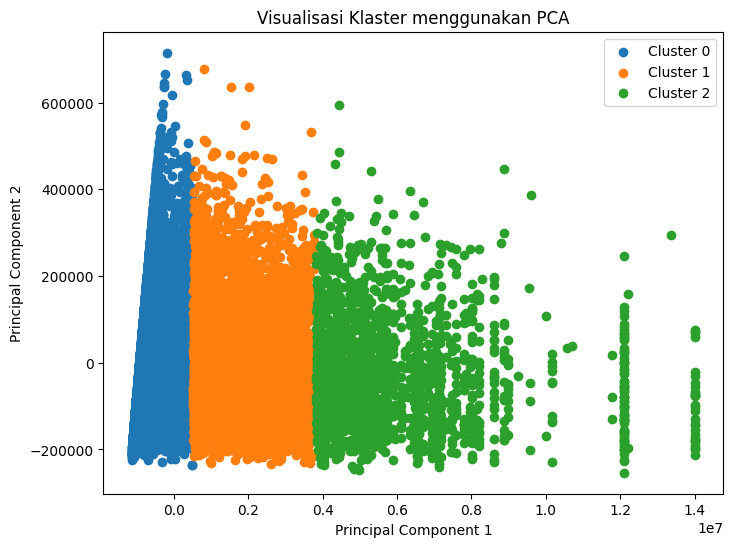

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2 komponen dengan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)  # Features dari data Anda

# Menambahkan label klaster ke dalam data yang sudah direduksi dimensinya
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = df_zeus['Cluster']

# Visualisasi klaster
plt.figure(figsize=(8, 6))
for cluster in principal_df['Cluster'].unique():
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Visualisasi Klaster menggunakan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Menggunakan silhouette score untuk mengevaluasi hasil klaster
silhouette_avg = silhouette_score(features, df_zeus['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.7296284344603751


Dengan nilai 0.703, ini menunjukkan bahwa mayoritas titik data cenderung berada dalam klaster yang tepat dan terpisah dengan baik dari klaster lainnya,